# Data Mining Project using CRISP-DM

<iframe 
  width="560" 
  height="315" 
  src="https://www.youtube.com/embed/RqIC5LwD974" 
  title="YouTube video player" 
  frameborder="0" 
  allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" 
  referrerpolicy="strict-origin-when-cross-origin" 
  allowfullscreen>
</iframe>

## Naive Bayes Model: Sentiment analysis based on customer reviews of Amazon products
### CRISP-DM Framework

The following sections are based on the CRISP-DM (Cross Industry Standard Process for Data Mining) framework.
#### 1. Business Understanding

- **Project Objectives:** The objective of this project is to predict the sentiment (positive/negative) of Amazon product reviews using a Naive Bayes classifier. This will allow product teams and sellers to quickly gauge customer satisfaction and identify trends in user feedback.

- **Background:** 
On Amazon, customer reviews play a crucial role in influencing purchasing decisions. However, manually analyzing thousands of product reviews is inefficient. By automating sentiment analysis, sellers and businesses can instantly identify customer sentiment, spot recurring issues, and improve product offerings based on feedback.

- **Success Criteria:** 
    - Achieve high classification accuracy (e.g., >80%).
    Develop a model that can be easily interpreted by product teams or marketers who may not have technical expertise.

- **Stakeholders:**
    - Amazon Sellers/Business Owners: Interested in monitoring customer sentiment to improve products and address any negative feedback.

    - Marketing Teams: Focus on tracking customer satisfaction and identifying trends in feedback for better customer engagement.

    - Data Analysts/Developers: Responsible for deploying, tuning, and maintaining the sentiment classification model.

- **Constraints:**
    - Text data may contain non-standard language  
    - The model must be explainable to non-technical users  
    - Limited computational resources for real-time prediction
#### 2. Data Understanding
We utilize the English reviews on Amazon items and FR translation dataset, which contains English-language Amazon product reviews along with their French translations.
https://www.kaggle.com/datasets/dargolex/english-reviews-on-amazon-items-and-fr-translation

- **Data Collection:** 
This dataset is publicly available on Kaggle and was compiled to support sentiment analysis tasks. It includes English reviews of various Amazon products and their corresponding French translations.

- **Data Description:** 
    - review_body: The text content of the English review.
    - review_translation: The French translation of the review.
    - star_rating: The rating given by the reviewer, typically ranging from 1 to 5 stars.
    - product_category: The category of the product being reviewed.

- **Initial Exploration:**
The relative distribution of all rating types, meaning that the ratings are evenly distributed 

```
rating
1    0.2
2    0.2
3    0.2
4    0.2
5    0.2
Name: proportion, dtype: float64
```
The word cloud gives a good idea if certain words are more common than others
![image.png](attachment:image.png)


For the analysis, the French translation is not needed. So this column is not needed to for this analysis.
#### 3. Data Preparation

- **Data Cleaning:** The column with the French translation is removed, as this information is not needed for this model
- **Feature Engineering:** A new column was created for a binomial distribution of the reviews for a better accuracy of the model. This column classifies the reviews into 'positive' or 'negative', based on the score column; numbers 1-2 are classified negative; 4-5 are classified positive.
The neutral comments (score: 3) were not used as these reviews had a negative influence on the accuracy of the model. 
#### 4. Modeling

- **Model Selection:** The naive bayes model was used because of efficiency it has with text data. Also the model works well with relatively large data sets and is fast to train, and efficient.
- **Parameter Tuning:** I tried to tune the parameter (alpha) with the use of cross validation and gridsearch, it resulted in a 0.01% change in accuracy.
- **Training & Validation:** I tried to split the data in multiple different splits, were the 80/20 split gave me the best results based on accuracy (eventhough the difference was small).


#### Questions to Consider:
- Which evaluation metrics were used to assess model performance?

The model was primarily evaluated using accuracy during grid search. However, for a more comprehensive performance analysis, I also examined the confusion matrix, precision, recall, and F1-score on the test set after training the final model. These additional metrics help assess how well the model performs across individual classes and whether it handles false positives/negatives effectively.


```
Best alpha: 0.9
Model Accuracy:  0.8493541666666666
[[20267  3673]
 [ 3558 20502]]
              precision    recall  f1-score   support

    negative       0.85      0.85      0.85     23940
    positive       0.85      0.85      0.85     24060

    accuracy                           0.85     48000
   macro avg       0.85      0.85      0.85     48000
weighted avg       0.85      0.85      0.85     48000
```



### 5. Evaluation

- **Performance Metrics:** 
```
Best alpha: 0.9
Model Accuracy:  0.8493541666666666
[[20267  3673]
 [ 3558 20502]]
              precision    recall  f1-score   support

    negative       0.85      0.85      0.85     23940
    positive       0.85      0.85      0.85     24060

    accuracy                           0.85     48000
   macro avg       0.85      0.85      0.85     48000
weighted avg       0.85      0.85      0.85     48000
```

- **Model Interpretability:** 
the model uses the 3000 most frequent words to calculate the probability that a review is either positive or negative based on the frequency of those words.

- **Comparison with Baseline:** 
The baseline model assumes predictions made at random, based on the class distribution in the dataset. Since the proportions for negative and positive sentiments are both 0.4, and neutral is 0.2, the highest baseline accuracy we can achieve by always predicting the majority class (either negative or positive) is 40%.

In comparison, my Naive Bayes model achieved an accuracy of 84,93%, which is significantly better than the baseline. This indicates that the model is effectively learning patterns in the data rather than making random or uniform predictions.

#### Questions to Consider:
- What are the strengths and weaknesses of your approach?
    Strenghts
Easy to understand model 
Fast to train 

    Weaknesses
relies on independence of words, which may not be the case in all natural language
can't determine sarcasm or slang
new terms (terms not in the original data set) may be misclassified

- Are there any biases or limitations in your model?
The model is created based on training data, so it might not perform the same on new data. It relies on the amount of data input how well it does in performing on new data
### 6. Deployment

- **Deployment Strategy:** 
The model can be used for for sentiment predictions on new products and thus wether customer are satisfied with there products. This could help with choosing the right type of product businesses could be offering to their customers. 
It could be deployed as a simple backend service (integrated into a web platform) where user feedback is collected.

- **Monitoring:** 
Performance could be measured by
    - logging predictions and compare them with actual feedback over time 
    - monitor the accuracy and retrain the model (if necassary) based on language changes

- **Future Work:** 
    - Expand the model so it could be used for multiple languages 
    - Expand the quantification by introducing how positive or negative a review is (sentiment scoring)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import colors
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV, RepeatedKFold
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

### Load data 

In [2]:
file_path = r"C:\Users\niels\.cache\kagglehub\datasets\dargolex\english-reviews-on-amazon-items-and-fr-translation\versions\1\english_to_french_products.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Display a preview of the data
df.head()

print(df['rating'].value_counts(normalize=True))

rating
1    0.2
2    0.2
3    0.2
4    0.2
5    0.2
Name: proportion, dtype: float64


### Clean data

In [3]:
# Creating a new DataFrame without the 'translation' column
df_cleaned_1 = df.drop('translation',axis=1)

# Display a preview of the new dataframe
print(df_cleaned_1.head())


   rating                                             review
0       1  Arrived broken. Manufacturer defect. Two of th...
1       1  the cabinet dot were all detached from backing...
2       1  I received my first order of this product and ...
3       1  This product is a piece of shit. Do not buy. D...
4       1  went through 3 in one day doesn't fit correct ...


In [4]:
# create a sentiment column based on ratings
def classify_sentiment(rating):
    if rating >= 4:
        return 'positive'
    elif rating <= 2:
        return 'negative'
    else:
        return 'neutral'

df_cleaned_1['sentiment'] = df_cleaned_1['rating'].apply(classify_sentiment)

# Check initial DataFrame with sentiment
print(df_cleaned_1.head())

# Remove neutral reviews for a binary classification
df_cleaned_2 = df_cleaned_1[df_cleaned_1['sentiment'] != 'neutral']

# Display the last few rows of cleaned data
print(df_cleaned_2.tail())

# Check the distribution of sentiments
print(df_cleaned_2['sentiment'].value_counts())
print(df_cleaned_2['sentiment'].value_counts(normalize=True))

   rating                                             review sentiment
0       1  Arrived broken. Manufacturer defect. Two of th...  negative
1       1  the cabinet dot were all detached from backing...  negative
2       1  I received my first order of this product and ...  negative
3       1  This product is a piece of shit. Do not buy. D...  negative
4       1  went through 3 in one day doesn't fit correct ...  negative
        rating                                             review sentiment
199995       5                  Cute slippers, my MIL loved them.  positive
199996       5  My 6 year old likes this and keeps him engaged...  positive
199997       5       Replaced my battery with it. Works like new.  positive
199998       5                      I like them, holding up well.  positive
199999       5  Very good for my village lights are bright I l...  positive
sentiment
negative    80000
positive    80000
Name: count, dtype: int64
sentiment
negative    0.5
positive    0.5
Name

dropping the neutral sentiment has a significant impact on the accuracy of the model as it changes the accuracy from +/- 68% to 85%

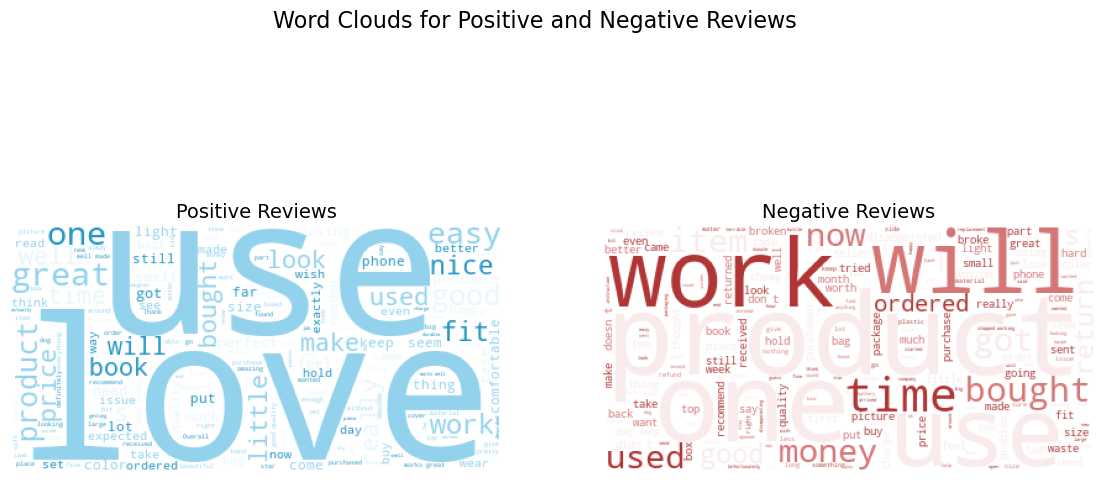

In [5]:
# Combine review text for each sentiment
positive_text = ' '.join(df_cleaned_2[df_cleaned_2['sentiment'] == 'positive']['review'])
negative_text = ' '.join(df_cleaned_2[df_cleaned_2['sentiment'] == 'negative']['review'])

# Define color schemes for positive and negative sentiments
color_list_positive = ['#e9f6fb', '#92d2ed', '#2195c5']  # Light to deep blue (positive)
color_list_negative = ['#f9ebeb', '#d57676', '#b03636']  # Light to dark red (negative)

# Create custom colormaps
colormap_positive = colors.ListedColormap(color_list_positive)
colormap_negative = colors.ListedColormap(color_list_negative)

# Generate word clouds
wordcloud_positive = WordCloud(background_color='white', colormap=colormap_positive).generate(positive_text)
wordcloud_negative = WordCloud(background_color='white', colormap=colormap_negative).generate(negative_text)

# Display the word clouds side by side
fig, (wc1, wc2) = plt.subplots(1, 2, figsize=(14, 7))
fig.suptitle('Word Clouds for Positive and Negative Reviews', fontsize=16)

# Positive sentiment word cloud
wc1.imshow(wordcloud_positive)
wc1.axis('off')
wc1.set_title('Positive Reviews', fontsize=14)

# Negative sentiment word cloud
wc2.imshow(wordcloud_negative)
wc2.axis('off')
wc2.set_title('Negative Reviews', fontsize=14)

plt.show()


In [6]:
# Initialize the TfidfVectorizer (limit to 3000 most important words)
vectorizer = TfidfVectorizer(max_features=3000)

# Apply TF-IDF on the 'review' column
vectors = vectorizer.fit_transform(df_cleaned_2['review'])

# Convert the TF-IDF matrix to a DataFrame
wordsDF = pd.DataFrame(vectors.toarray(), columns=vectorizer.get_feature_names_out())

# Display the first 5 rows of the TF-IDF DataFrame
print(wordsDF.head())


    00   10  100   11   12   13   14   15  150   16  ...  young  younger  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0      0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0      0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0      0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0      0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0      0.0   

   your  yourself  youtube   yr  zero  zip  zipper  zippers  
0   0.0       0.0      0.0  0.0   0.0  0.0     0.0      0.0  
1   0.0       0.0      0.0  0.0   0.0  0.0     0.0      0.0  
2   0.0       0.0      0.0  0.0   0.0  0.0     0.0      0.0  
3   0.0       0.0      0.0  0.0   0.0  0.0     0.0      0.0  
4   0.0       0.0      0.0  0.0   0.0  0.0     0.0      0.0  

[5 rows x 3000 columns]


In [7]:
# Split the data into training and testing sets (70% train, 30% test)
xTrain, xTest, yTrain, yTest = train_test_split(wordsDF, df_cleaned_2['sentiment'], test_size=0.3, random_state=42)

print(f"xTrain shape: {xTrain.shape}, xTest shape: {xTest.shape}")
print(f"yTrain shape: {yTrain.shape}, yTest shape: {yTest.shape}")


xTrain shape: (112000, 3000), xTest shape: (48000, 3000)
yTrain shape: (112000,), yTest shape: (48000,)


In [8]:
# Initialize the Naive Bayes model
bayes = MultinomialNB()

# Train (fit) the model using the training data
bayes.fit(xTrain, yTrain)

print("Model training completed successfully!")


Model training completed successfully!


In [9]:
yPred = bayes.predict(xTest)
yTrue = yTest

# Make predictions on the test set
yPred = bayes.predict(xTest)

# Evaluate model accuracy
accuracyScore = accuracy_score(yTest, yPred)
print(f'Accuracy: {accuracyScore:.10f}')


Accuracy: 0.8492708333


In [10]:
# Define alpha range for grid search
alpha_range = np.arange(start=0.1, stop=1, step=0.1) 

# Define aspects of grid search
cv = RepeatedKFold(n_splits=5, random_state=42)  # 5-fold cross-validation

# Define the hyperparameters for the grid search
param = {'alpha': alpha_range}

# Initialize the Naive Bayes model
bayes = MultinomialNB()

# Set up the grid search for optimal alpha
grid_search = GridSearchCV(bayes,
                           param_grid=param,
                           scoring='accuracy',  # You can change this to other metrics if needed
                           cv=cv)

# Fit the model using the training data
grid_search.fit(xTrain, yTrain)

# Print the best hyperparameters from the grid search
print("Best alpha:", grid_search.best_params_['alpha'])

# Get the best model
best_bayes = grid_search.best_estimator_

# Predict on the test set (xTest)
yPred = best_bayes.predict(xTest)

# Print the accuracy of the model
accuracy = accuracy_score(yTest, yPred)
print("Model Accuracy: ", accuracy)

# print the confusion matrix or classification report
print(confusion_matrix(yTest, yPred))
print(classification_report(yTest, yPred))


Best alpha: 0.9
Model Accuracy:  0.8493541666666666
[[20267  3673]
 [ 3558 20502]]
              precision    recall  f1-score   support

    negative       0.85      0.85      0.85     23940
    positive       0.85      0.85      0.85     24060

    accuracy                           0.85     48000
   macro avg       0.85      0.85      0.85     48000
weighted avg       0.85      0.85      0.85     48000



                 Predicted negative  Predicted positive
Actual negative               20267                3673
Actual positive                3558               20502


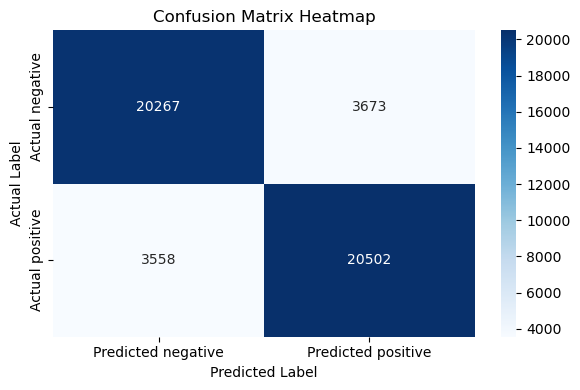

In [11]:
# Generate the confusion matrix
matrix = confusion_matrix(yTest, yPred)

# Define the sentiment labels
labelNames = pd.Series(['negative', 'positive'])

# Create a DataFrame for better visualization
confusion_df = pd.DataFrame(matrix,
                            columns='Predicted ' + labelNames,
                            index='Actual ' + labelNames)

print(confusion_df)

# Create a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Heatmap')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()